# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime


In [3]:
# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities;
#the np.random.seed is used to keep the same set of random items ex. np.random.seed(42) will keep the same 42 cities
np.random.seed(500) #UNCOMMENT/CHECK THIS WHEN READY TO RUN
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
#  random.uniform(low=0.0, high = 1.0, size=None); draws samples from a random distribution
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #country = citypy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
        
# Print the city count to confirm sufficient count
print(len(cities))


618


In [6]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ponta do sol,,,,,,,
1,busselton,,,,,,,
2,saint george,,,,,,,
3,bang saphan,,,,,,,
4,bredasdorp,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#variables to track responses
set_1 = 1
set_2 = 1

#base url to call api
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#call api for each city

for index, row in city_weather.iterrows():
    
    query_url = base_url + row['City'] + ',' + '&APPID=' + api_key
      
    response = requests.get(query_url).json()
        
#Exception script in case city not found by the API call
    try: 
        #alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {set_1} of Set {set_2} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase record count
        set_1 += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #statement to handle API call limits
    if set_1 == 51:
        set_2 += 1
        set_1 = 1
        time.sleep(60)
        
print('''''')

Processing Weather Data for Record 1 of Set 1 | Ponta do Sol
Processing Weather Data for Record 2 of Set 1 | Busselton
Processing Weather Data for Record 3 of Set 1 | Saint George
Processing Weather Data for Record 4 of Set 1 | Bang Saphan
Processing Weather Data for Record 5 of Set 1 | Bredasdorp
Processing Weather Data for Record 6 of Set 1 | Arica
Processing Weather Data for Record 7 of Set 1 | Hong Kong
City not found....Skipping............
Processing Weather Data for Record 8 of Set 1 | Carnarvon
Processing Weather Data for Record 9 of Set 1 | Alice Springs
Processing Weather Data for Record 10 of Set 1 | Flin Flon
Processing Weather Data for Record 11 of Set 1 | Pucallpa
Processing Weather Data for Record 12 of Set 1 | Saint-Philippe
Processing Weather Data for Record 13 of Set 1 | Vaini
City not found....Skipping............
Processing Weather Data for Record 14 of Set 1 | Saskylakh
City not found....Skipping............
Processing Weather Data for Record 15 of Set 1 | Rikitea


Processing Weather Data for Record 29 of Set 3 | Kavieng
Processing Weather Data for Record 30 of Set 3 | Cabo San Lucas
Processing Weather Data for Record 31 of Set 3 | Kirakira
Processing Weather Data for Record 32 of Set 3 | Oranjemund
Processing Weather Data for Record 33 of Set 3 | Fomboni
Processing Weather Data for Record 34 of Set 3 | Havelock
Processing Weather Data for Record 35 of Set 3 | Katsuura
Processing Weather Data for Record 36 of Set 3 | Acaraú
Processing Weather Data for Record 37 of Set 3 | Senhor do Bonfim
Processing Weather Data for Record 38 of Set 3 | Charters Towers
City not found....Skipping............
Processing Weather Data for Record 39 of Set 3 | Inhambane
Processing Weather Data for Record 40 of Set 3 | Cam Ranh
City not found....Skipping............
Processing Weather Data for Record 41 of Set 3 | Castro
Processing Weather Data for Record 42 of Set 3 | Oktyabr'skoye
Processing Weather Data for Record 43 of Set 3 | Waipawa
City not found....Skipping....

Processing Weather Data for Record 9 of Set 6 | Chicama
Processing Weather Data for Record 10 of Set 6 | Necochea
Processing Weather Data for Record 11 of Set 6 | Leningradskiy
Processing Weather Data for Record 12 of Set 6 | Valparaíso
City not found....Skipping............
Processing Weather Data for Record 13 of Set 6 | Santa Rosalía
Processing Weather Data for Record 14 of Set 6 | Örnsköldsvik
Processing Weather Data for Record 15 of Set 6 | Filiatrá
Processing Weather Data for Record 16 of Set 6 | Moctezuma
Processing Weather Data for Record 17 of Set 6 | Bealanana
Processing Weather Data for Record 18 of Set 6 | Bonavista
Processing Weather Data for Record 19 of Set 6 | Ponta Delgada
Processing Weather Data for Record 20 of Set 6 | Puerto Armuelles
City not found....Skipping............
Processing Weather Data for Record 21 of Set 6 | Teavaro
Processing Weather Data for Record 22 of Set 6 | Kungsbacka
Processing Weather Data for Record 23 of Set 6 | Road Town
Processing Weather D

Processing Weather Data for Record 31 of Set 8 | Alugan
Processing Weather Data for Record 32 of Set 8 | Caramay
Processing Weather Data for Record 33 of Set 8 | Makassar
Processing Weather Data for Record 34 of Set 8 | Norman Wells
Processing Weather Data for Record 35 of Set 8 | Padang
Processing Weather Data for Record 36 of Set 8 | Bathsheba
Processing Weather Data for Record 37 of Set 8 | Sherlovaya Gora
Processing Weather Data for Record 38 of Set 8 | Aklavik
Processing Weather Data for Record 39 of Set 8 | Deputatsky
Processing Weather Data for Record 40 of Set 8 | Quatre Cocos
Processing Weather Data for Record 41 of Set 8 | Kieta
Processing Weather Data for Record 42 of Set 8 | Nhulunbuy
Processing Weather Data for Record 43 of Set 8 | Kaeo
Processing Weather Data for Record 44 of Set 8 | Oddur
Processing Weather Data for Record 45 of Set 8 | Igrim
Processing Weather Data for Record 46 of Set 8 | Dhemāji
Processing Weather Data for Record 47 of Set 8 | Pa Sang
Processing Weath

Processing Weather Data for Record 12 of Set 11 | Arman'
Processing Weather Data for Record 13 of Set 11 | Zomin
Processing Weather Data for Record 14 of Set 11 | Gwadar
Processing Weather Data for Record 15 of Set 11 | Gamba
Processing Weather Data for Record 16 of Set 11 | Victor Harbor
Processing Weather Data for Record 17 of Set 11 | Lunino
City not found....Skipping............
Processing Weather Data for Record 18 of Set 11 | Omboué
Processing Weather Data for Record 19 of Set 11 | Poum
Processing Weather Data for Record 20 of Set 11 | Artyom
Processing Weather Data for Record 21 of Set 11 | Formosa
City not found....Skipping............
Processing Weather Data for Record 22 of Set 11 | Maniitsoq
Processing Weather Data for Record 23 of Set 11 | Irará
Processing Weather Data for Record 24 of Set 11 | Merauke
Processing Weather Data for Record 25 of Set 11 | Saposoa
Processing Weather Data for Record 26 of Set 11 | La Trinité
Processing Weather Data for Record 27 of Set 11 | Jacar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#remove cities that were not found from dataframe and convert file to csv
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ponta do sol,40,1615390020,59,32.6667,-17.1,63.00,13.8
1,busselton,100,1615390020,91,-33.65,115.333,72.00,4
2,saint george,1,1615390021,30,37.1041,-113.584,45.00,11.5
3,bang saphan,2,1615390021,84,11.2126,99.5117,76.98,1.3
4,bredasdorp,87,1615390021,88,-34.5322,20.0403,69.80,2.3


In [23]:
city_weather.to_csv("CityWeatherData.csv", index=False, header=True)
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ponta do sol,40,1615390020,59,32.6667,-17.1,63.00,13.8
1,busselton,100,1615390020,91,-33.65,115.333,72.00,4
2,saint george,1,1615390021,30,37.1041,-113.584,45.00,11.5
3,bang saphan,2,1615390021,84,11.2126,99.5117,76.98,1.3
4,bredasdorp,87,1615390021,88,-34.5322,20.0403,69.80,2.3


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

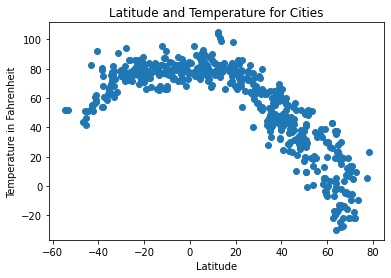

In [24]:
#create scatter plot for latitude vs. temp
plt.scatter(city_weather["Lat"], city_weather['Max Temp'], marker='o')
plt.title(f'Latitude and Temperature for Cities')
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenheit")
plt.savefig("Latitude and Temperature.png")
plt.show() 

In [13]:
print(f"In this plot, it appears that there is a decrease in temperature for cities that are north of the equator.")

In this plot, it appears that there is a decrease in temperature for cities that are north of the equator.


## Latitude vs. Humidity Plot

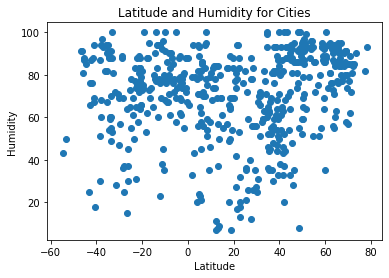

In [25]:
#create scatter plot for latitude vs. humidity
plt.scatter(city_weather["Lat"], city_weather['Humidity'], marker='o')
plt.title(f'Latitude and Humidity for Cities')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Latitude and Humidity.png")
plt.show()

In [15]:
print(f"There does not appear to be a strong correlation between latitude and humidity.")

There does not appear to be a strong correlation between latitude and humidity.


## Latitude vs. Cloudiness Plot

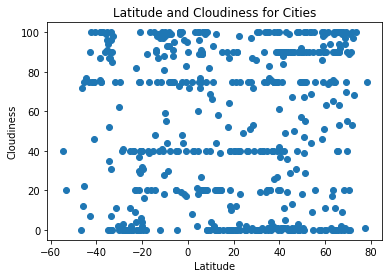

In [26]:
#create scatter plot for latitude vs. cloudiness
plt.scatter(city_weather["Lat"], city_weather['Cloudiness'], marker='o')
plt.title(f'Latitude and Cloudiness for Cities')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Latitude and Cloudiness.png")
plt.show()

In [17]:
print(f"There does not appear to be a strong correlation between latitude and cloudiness.")

There does not appear to be a strong correlation between latitude and cloudiness.


## Latitude vs. Wind Speed Plot

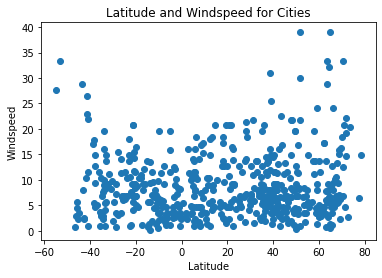

In [27]:
#create scatter plot for latitude vs. wind speed
plt.scatter(city_weather["Lat"], city_weather['Windspeed'], marker='o')
plt.title(f'Latitude and Windspeed for Cities')
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.savefig("Latitude and Windspeed.png")
plt.show()

In [19]:
print(f"There does not appear to be a strong correlation between latitude and wind speed.")

There does not appear to be a strong correlation between latitude and wind speed.


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
L=0
Northern = city_weather.query(f"Lat >= {L}")
Southern = city_weather.query(f"Lat <= {L}")

The correlation coefficient(R^2) is: -0.9028530713454936


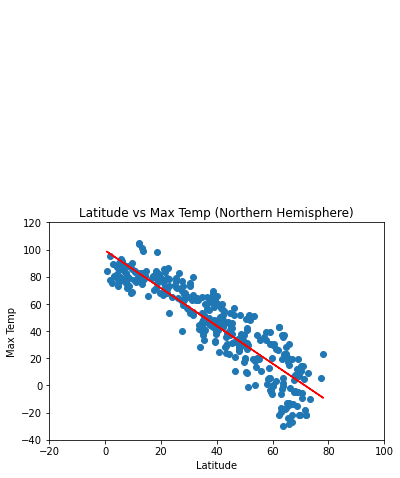

In [31]:
x_values=Northern['Lat']
y_values=Northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.5916313354295367


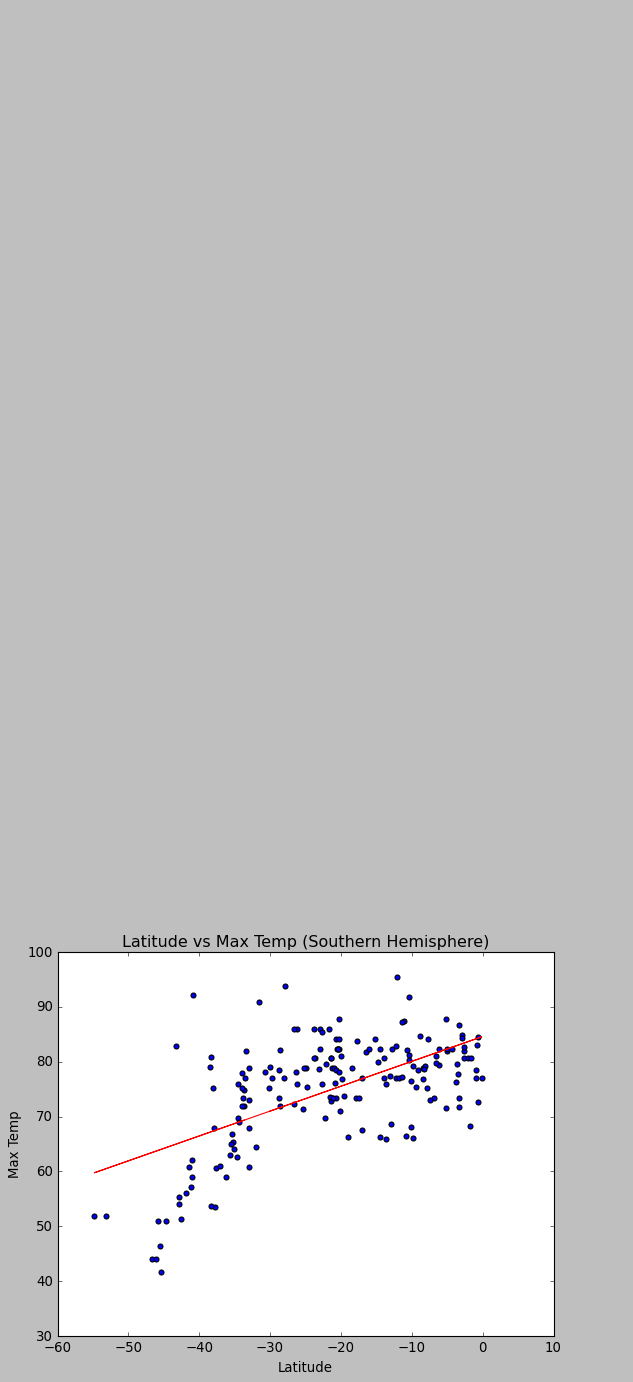

In [32]:
x_values=Southern['Lat']
y_values=Southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Max Temp (Southern Hemisphere).png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 1.0


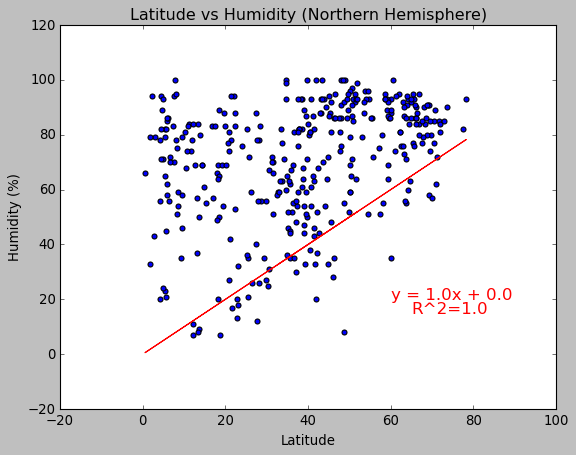

In [35]:
x_values=Northern['Lat']
y_values=Northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), x_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(65,15),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Humidity (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 1.0


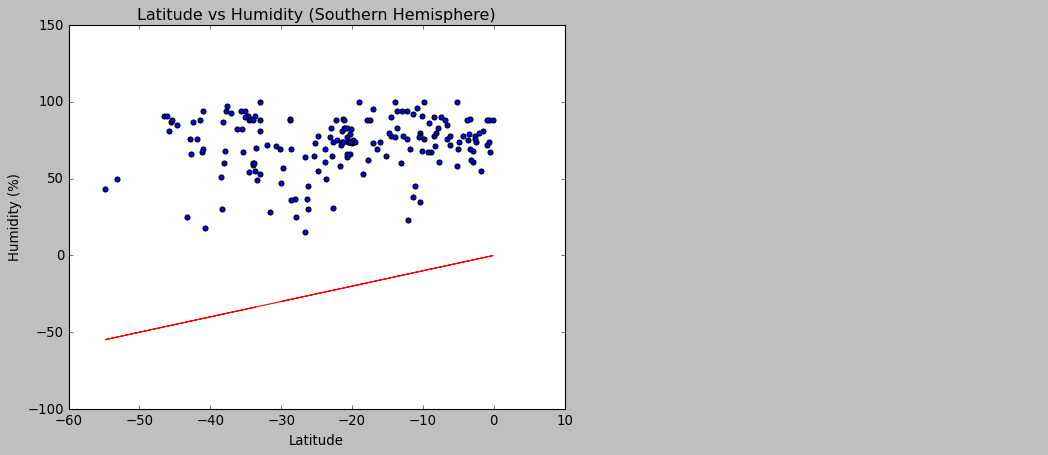

In [36]:
x_values=Southern['Lat']
y_values=Southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), x_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(65,15),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Humidity (SouthernHemisphere).png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.1392736072041916


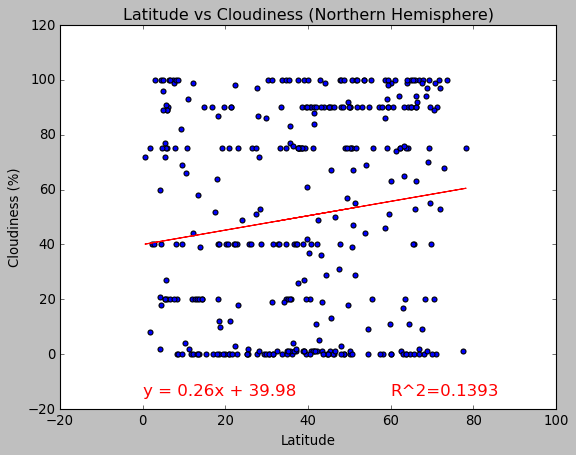

In [38]:
x_values=Northern['Lat']
y_values=Northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(60,-15),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Cloudiness (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.11172478022013006


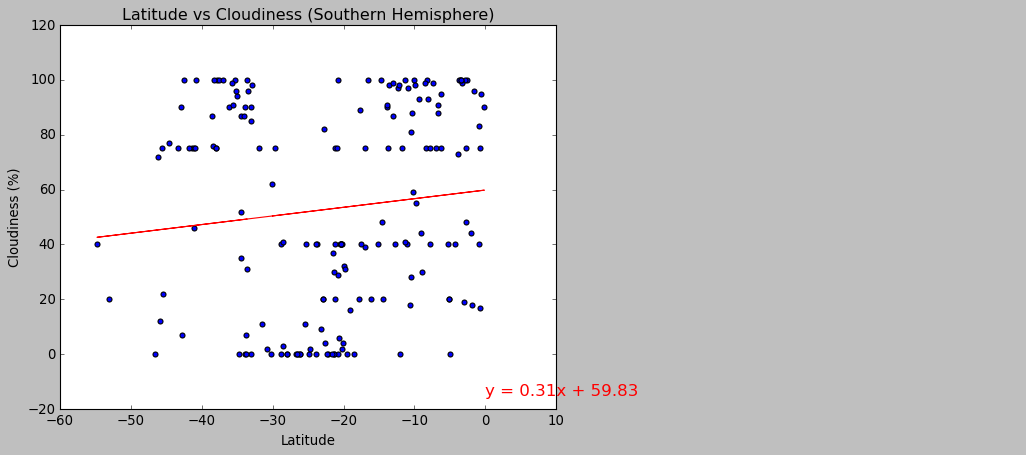

In [39]:
x_values=Southern['Lat']
y_values=Southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(60,-15),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Cloudiness (SouthernHemisphere).png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.11179736843265796


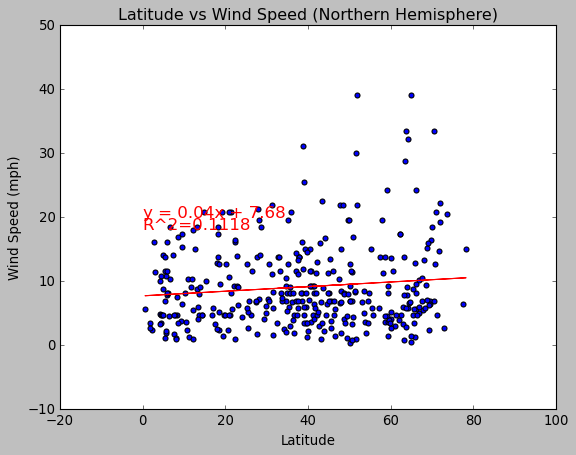

In [42]:
x_values=Northern['Lat']
y_values=Northern['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,18),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Wind Speed (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.27738288153635726


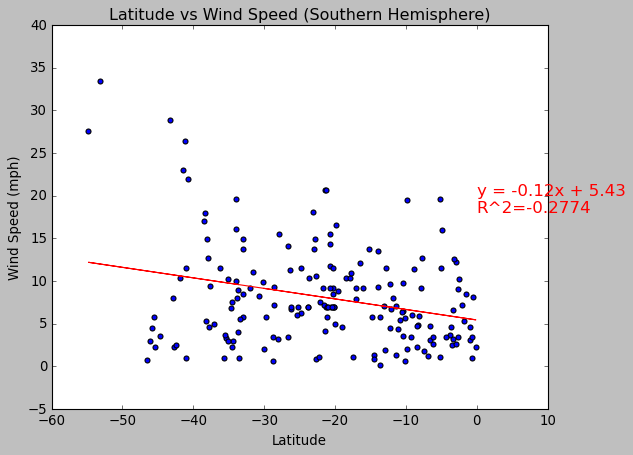

In [43]:
x_values=Southern['Lat']
y_values=Southern['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,18),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Wind Speed (Southern Hemisphere).png")
plt.show()